# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup

import hvplot.pandas
import pandas as pd
import requests
from IPython.display import display as disp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../VacationPy/cities.csv")

# Display sample data
city_data_df.head()
city_data_df.tail()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,palopo,-2.9996,120.1921,24.69,90,100,1.03,ID,1738368695
1,1,susuman,62.7833,148.1667,-42.52,99,82,0.14,RU,1738368696
2,2,invercargill,-46.4000,168.3500,20.57,57,100,3.13,NZ,1738368698
3,3,thompson,55.7435,-97.8558,-27.78,98,29,1.92,CA,1738368685
4,4,edinburgh of the seven seas,-37.0676,-12.3116,17.16,83,43,7.70,SH,1738368701


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
548,548,zaozersk,69.4005,32.4476,-2.37,98,100,2.07,RU,1738369396
549,549,sungai penuh,-2.0833,101.3833,18.03,82,93,1.61,ID,1738369398
550,550,rosarito,32.3333,-117.0333,16.51,70,42,5.73,MX,1738368725
551,551,taro,-8.3862,115.2800,22.18,85,100,0.88,ID,1738369400
552,552,sa pa,22.3402,103.8441,7.42,84,70,1.05,VN,1738369401


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
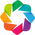

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

In [3]:
import geoviews as gv
import holoviews as hv
from holoviews import opts

gv.extension('bokeh')

# Geoapify API key and tile URL
geoapify_key = "your_api_key"
tile_url = f"https://maps.geoapify.com/v1/tile/osm-bright/{{z}}/{{x}}/{{y}}.png?apiKey={geoapify_key}"

# Define the GeoViews tile layer
tiles = gv.tile_sources.WMTS(tile_url)

# Create points for each city
points = gv.Points(city_data_df,
    ['Lng', 'Lat'],  # Use Longitude and Latitude for points
    ['City', 'Humidity']  # Display City and Humidity on hover
)

# Customize point style based on Humidity
points = points.opts(
    opts.Points(
        size=hv.dim('Humidity') * 0.2,  # Scale size with Humidity
        color='Humidity',
        cmap='Viridis',
        tools=['hover'],
        width=800,
        height=600,
    )
)

# Combine tiles and points
map_with_points = tiles * points
map_with_points


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE

ideal_weather_df = city_data_df[
    (city_data_df["Max Temp"] >= 22) &
    (city_data_df["Max Temp"] <= 32) &
    (city_data_df["Humidity"] < 60) &
    (city_data_df["Cloudiness"] == 0) &
    (city_data_df["Wind Speed"] < 5)
]

# Drop any rows with null values
# YOUR CODE HERE

ideal_weather_df = ideal_weather_df.dropna()

# Display sample data
# YOUR CODE HERE

ideal_weather_df.head()
ideal_weather_df.tail()



,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
70,70,cabo san lucas,22.8909,-109.9124,24.17,45,0,4.12,MX,1738368592
245,245,villamontes,-21.2500,-63.5000,24.53,44,0,1.20,BO,1738369007
361,361,puerto carreno,6.1890,-67.4859,30.99,48,0,3.25,CO,1738368939
400,400,plaza huincul,-38.9260,-69.2086,26.40,19,0,4.18,AR,1738368921
427,427,diego de almagro,-26.3667,-70.0500,22.72,40,0,2.67,CL,1738368983


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
400,400,plaza huincul,-38.9260,-69.2086,26.40,19,0,4.18,AR,1738368921
427,427,diego de almagro,-26.3667,-70.0500,22.72,40,0,2.67,CL,1738368983
463,463,chacabuco,-34.6417,-60.4739,27.61,24,0,2.27,AR,1738369149
483,483,port augusta,-32.5000,137.7667,31.90,15,0,3.85,AU,1738369313
494,494,tandil,-37.3217,-59.1332,26.05,32,0,2.73,AR,1738368678


In [5]:
type(ideal_weather_df)

pandas.core.frame.DataFrame

### Step 3: Create a new DataFrame called `hotel_df`.

In [6]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE

hotel_df = ideal_weather_df.copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

hotel_df["Hotel Name"] = ""

# Display sample data

hotel_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
70,70,cabo san lucas,22.8909,-109.9124,24.17,45,0,4.12,MX,1738368592,
245,245,villamontes,-21.2500,-63.5000,24.53,44,0,1.20,BO,1738369007,
361,361,puerto carreno,6.1890,-67.4859,30.99,48,0,3.25,CO,1738368939,
400,400,plaza huincul,-38.9260,-69.2086,26.40,19,0,4.18,AR,1738368921,
427,427,diego de almagro,-26.3667,-70.0500,22.72,40,0,2.67,CL,1738368983,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [15]:
from api_keys import geoapify_places_key
radius = 10000
params = {
    "categories": "accommodation.hotel",
    "limit": 1,
    "filter": f"circle:{longitude},{latitude},{radius}",
    "bias": f"proximity:{longitude},{latitude}",
    "apiKey": geoapify_places_key
}
print(params)

{'categories': 'accommodation.hotel', 'limit': 1, 'filter': 'circle:-59.1332,-37.3217,10000', 'bias': 'proximity:-59.1332,-37.3217', 'apiKey': '2dca16c2a54446d2aa5ce9f6e3b992df'}


In [18]:
# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE
    latitude = row["Lat"]
    longitude = row["Lng"]
    # Update parameters with the city's coordinates
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"  # Favor results near this location
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = requests.get(base_url, params=params)

    # Convert the response to JSON
    name_address = name_address.json()
    print(name_address)

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df


Starting hotel search
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'name': 'Comfort Rooms', 'country': 'Mexico', 'country_code': 'mx', 'state': 'Baja California Sur', 'county': 'Los Cabos Municipality', 'city': 'Cabo San Lucas', 'postcode': '23469', 'suburb': 'Juárez', 'street': 'Calle Revolución de 1910', 'lon': -109.9119612, 'lat': 22.8904798, 'state_code': 'BCS', 'formatted': 'Comfort Rooms, Calle Revolución de 1910, Juárez, 23469 Cabo San Lucas, BCS, Mexico', 'address_line1': 'Comfort Rooms', 'address_line2': 'Calle Revolución de 1910, Juárez, 23469 Cabo San Lucas, BCS, Mexico', 'categories': ['accommodation', 'accommodation.hotel'], 'details': [], 'datasource': {'sourcename': 'openstreetmap', 'attribution': '© OpenStreetMap contributors', 'license': 'Open Database License', 'url': 'https://www.openstreetmap.org/copyright', 'raw': {'name': 'Comfort Rooms', 'osm_id': 1683615044, 'tourism': 'hotel', 'osm_type': 'n'}}, 'distance': 65, 'place_id': '5123

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
70,70,cabo san lucas,22.8909,-109.9124,24.17,45,0,4.12,MX,1738368592,Comfort Rooms
245,245,villamontes,-21.2500,-63.5000,24.53,44,0,1.20,BO,1738369007,Hoterma
361,361,puerto carreno,6.1890,-67.4859,30.99,48,0,3.25,CO,1738368939,Carreño Plaza
400,400,plaza huincul,-38.9260,-69.2086,26.40,19,0,4.18,AR,1738368921,Antu Malal Aparts & Suites
427,427,diego de almagro,-26.3667,-70.0500,22.72,40,0,2.67,CL,1738368983,Residencial Hambyll
463,463,chacabuco,-34.6417,-60.4739,27.61,24,0,2.27,AR,1738369149,Hotel Postal
483,483,port augusta,-32.5000,137.7667,31.90,15,0,3.85,AU,1738369313,Hotel Commonwealth
494,494,tandil,-37.3217,-59.1332,26.05,32,0,2.73,AR,1738368678,Viñas del Rosario Hotel Boutique


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [19]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE